**Topic : Visualization of lungs cancer**

Here are the presentation in ordered way


In [34]:
import pandas as pd
df = pd.read_csv('dataset.csv')
print(df.head())  # Display the first few rows of the DataFrame

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

In [35]:
# removing the unessary columns for the data set
df = pd.read_csv('dataset.csv')

columns_to_remove = ['SWALLOWING_DIFFICULTY', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ANXIETY', 'PEER_PRESSURE','GENDER']
for col in columns_to_remove:
    if col in df.columns:
        df = df.drop(col, axis=1)
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

print(df.head())

   AGE  SMOKING  YELLOW_FINGERS  CHRONIC_DISEASE  ALCOHOL_CONSUMING  COUGHING  \
0   65        1               1                2                  2         2   
1   55        1               2                1                  1         1   
2   78        2               2                1                  1         1   
3   60        2               1                2                  1         2   
4   80        1               1                1                  1         1   

   SHORTNESS_OF_BREATH  CHEST_PAIN LUNG_CANCER  
0                    2           1          NO  
1                    1           2          NO  
2                    2           1         YES  
3                    1           2         YES  
4                    1           2          NO  


In [36]:
df.shape

(3000, 9)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE                  3000 non-null   int64 
 1   SMOKING              3000 non-null   int64 
 2   YELLOW_FINGERS       3000 non-null   int64 
 3   CHRONIC_DISEASE      3000 non-null   int64 
 4   ALCOHOL_CONSUMING    3000 non-null   int64 
 5   COUGHING             3000 non-null   int64 
 6   SHORTNESS_OF_BREATH  3000 non-null   int64 
 7   CHEST_PAIN           3000 non-null   int64 
 8   LUNG_CANCER          3000 non-null   object
dtypes: int64(8), object(1)
memory usage: 211.1+ KB


Data Cleaning


In [38]:
df.isna().sum() # checking for null value

,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
CHRONIC_DISEASE,0
ALCOHOL_CONSUMING,0
COUGHING,0
SHORTNESS_OF_BREATH,0
CHEST_PAIN,0
LUNG_CANCER,0


In [39]:
df.duplicated() # checking foe duplicated value

,0
0,False
1,False
2,False
3,False
4,False
...,...
2995,False
2996,True
2997,False
2998,False


<Axes: >

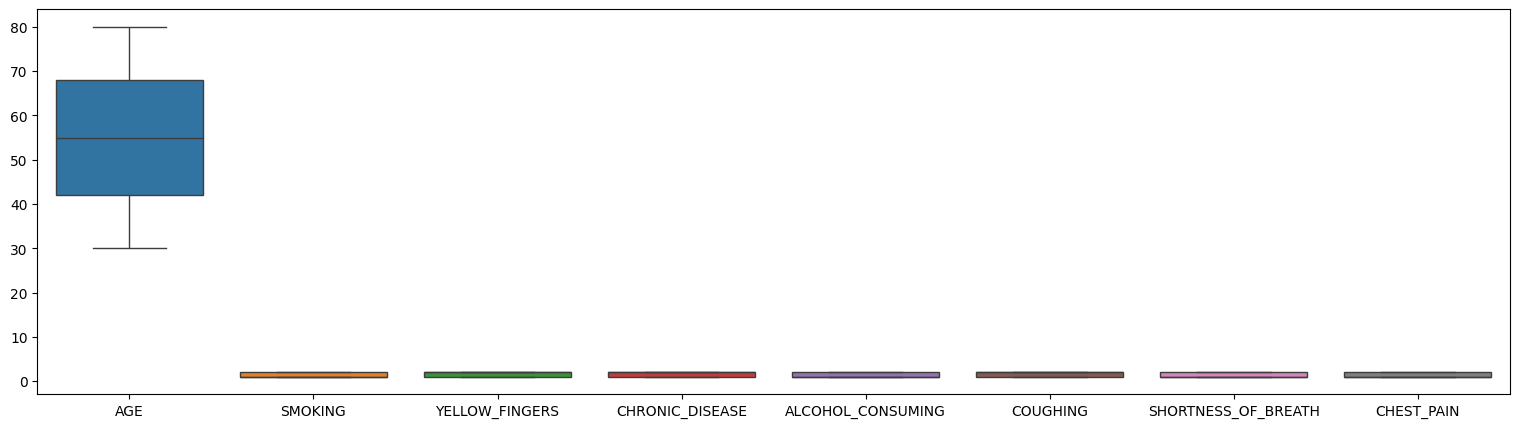

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting box plot

fig,ax=plt.subplots(figsize=(19,5))
sns.boxplot(data=df, ax=ax)

**Exploratory Data Analysis (EDA)**

Descriptive Data Analysis

In [41]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,CHRONIC_DISEASE,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.509667,1.491333,1.510667,1.488000,1.498667
std,14.723746,0.500002,0.499887,0.499990,0.500008,0.499970,0.499939,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


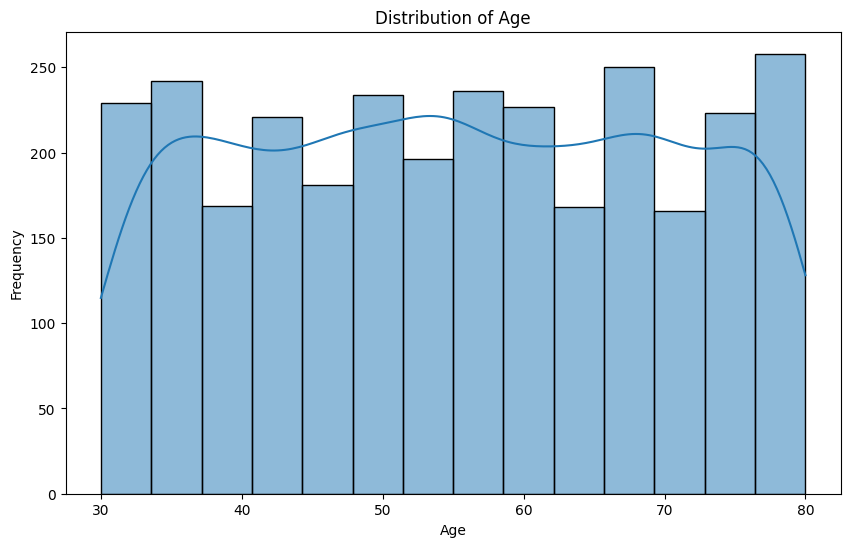

In [42]:
# Histogram with density curve for age

plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

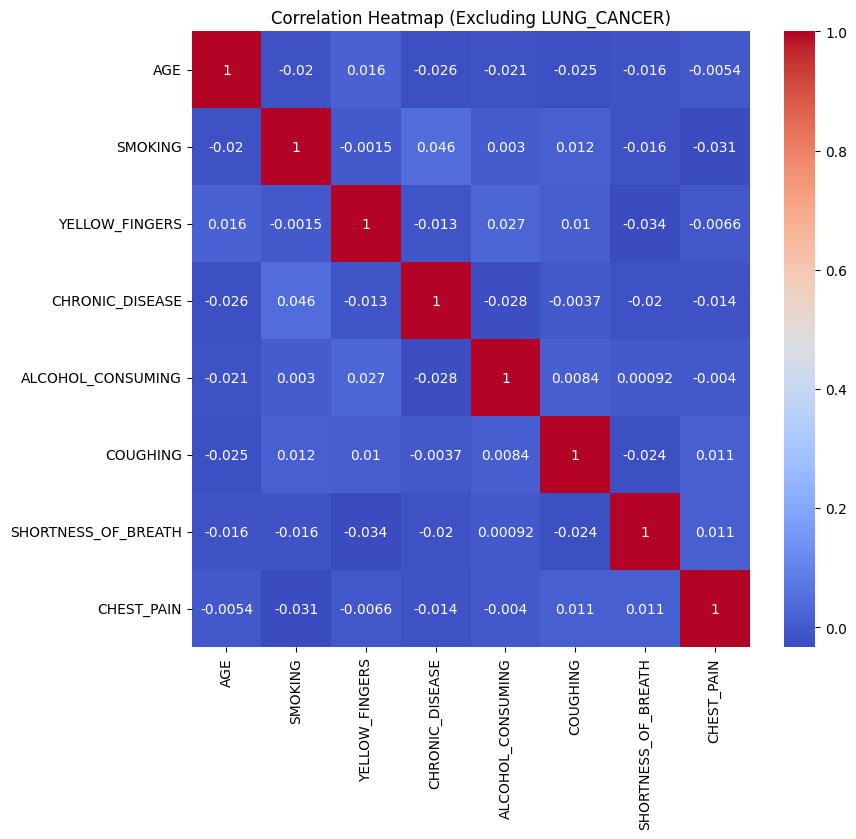

In [45]:
# prompt: create a heatmap and not include LUNG_CANCER

# Assuming 'LUNG_CANCER' is a column in your DataFrame
if 'LUNG_CANCER' in df.columns:
    df_no_lung_cancer = df.drop('LUNG_CANCER', axis=1)
    plt.figure(figsize=(9, 8))
    sns.heatmap(df_no_lung_cancer.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap (Excluding LUNG_CANCER)')
    plt.show()
else:
    print("Warning: 'LUNG_CANCER' column not found in the DataFrame.")
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

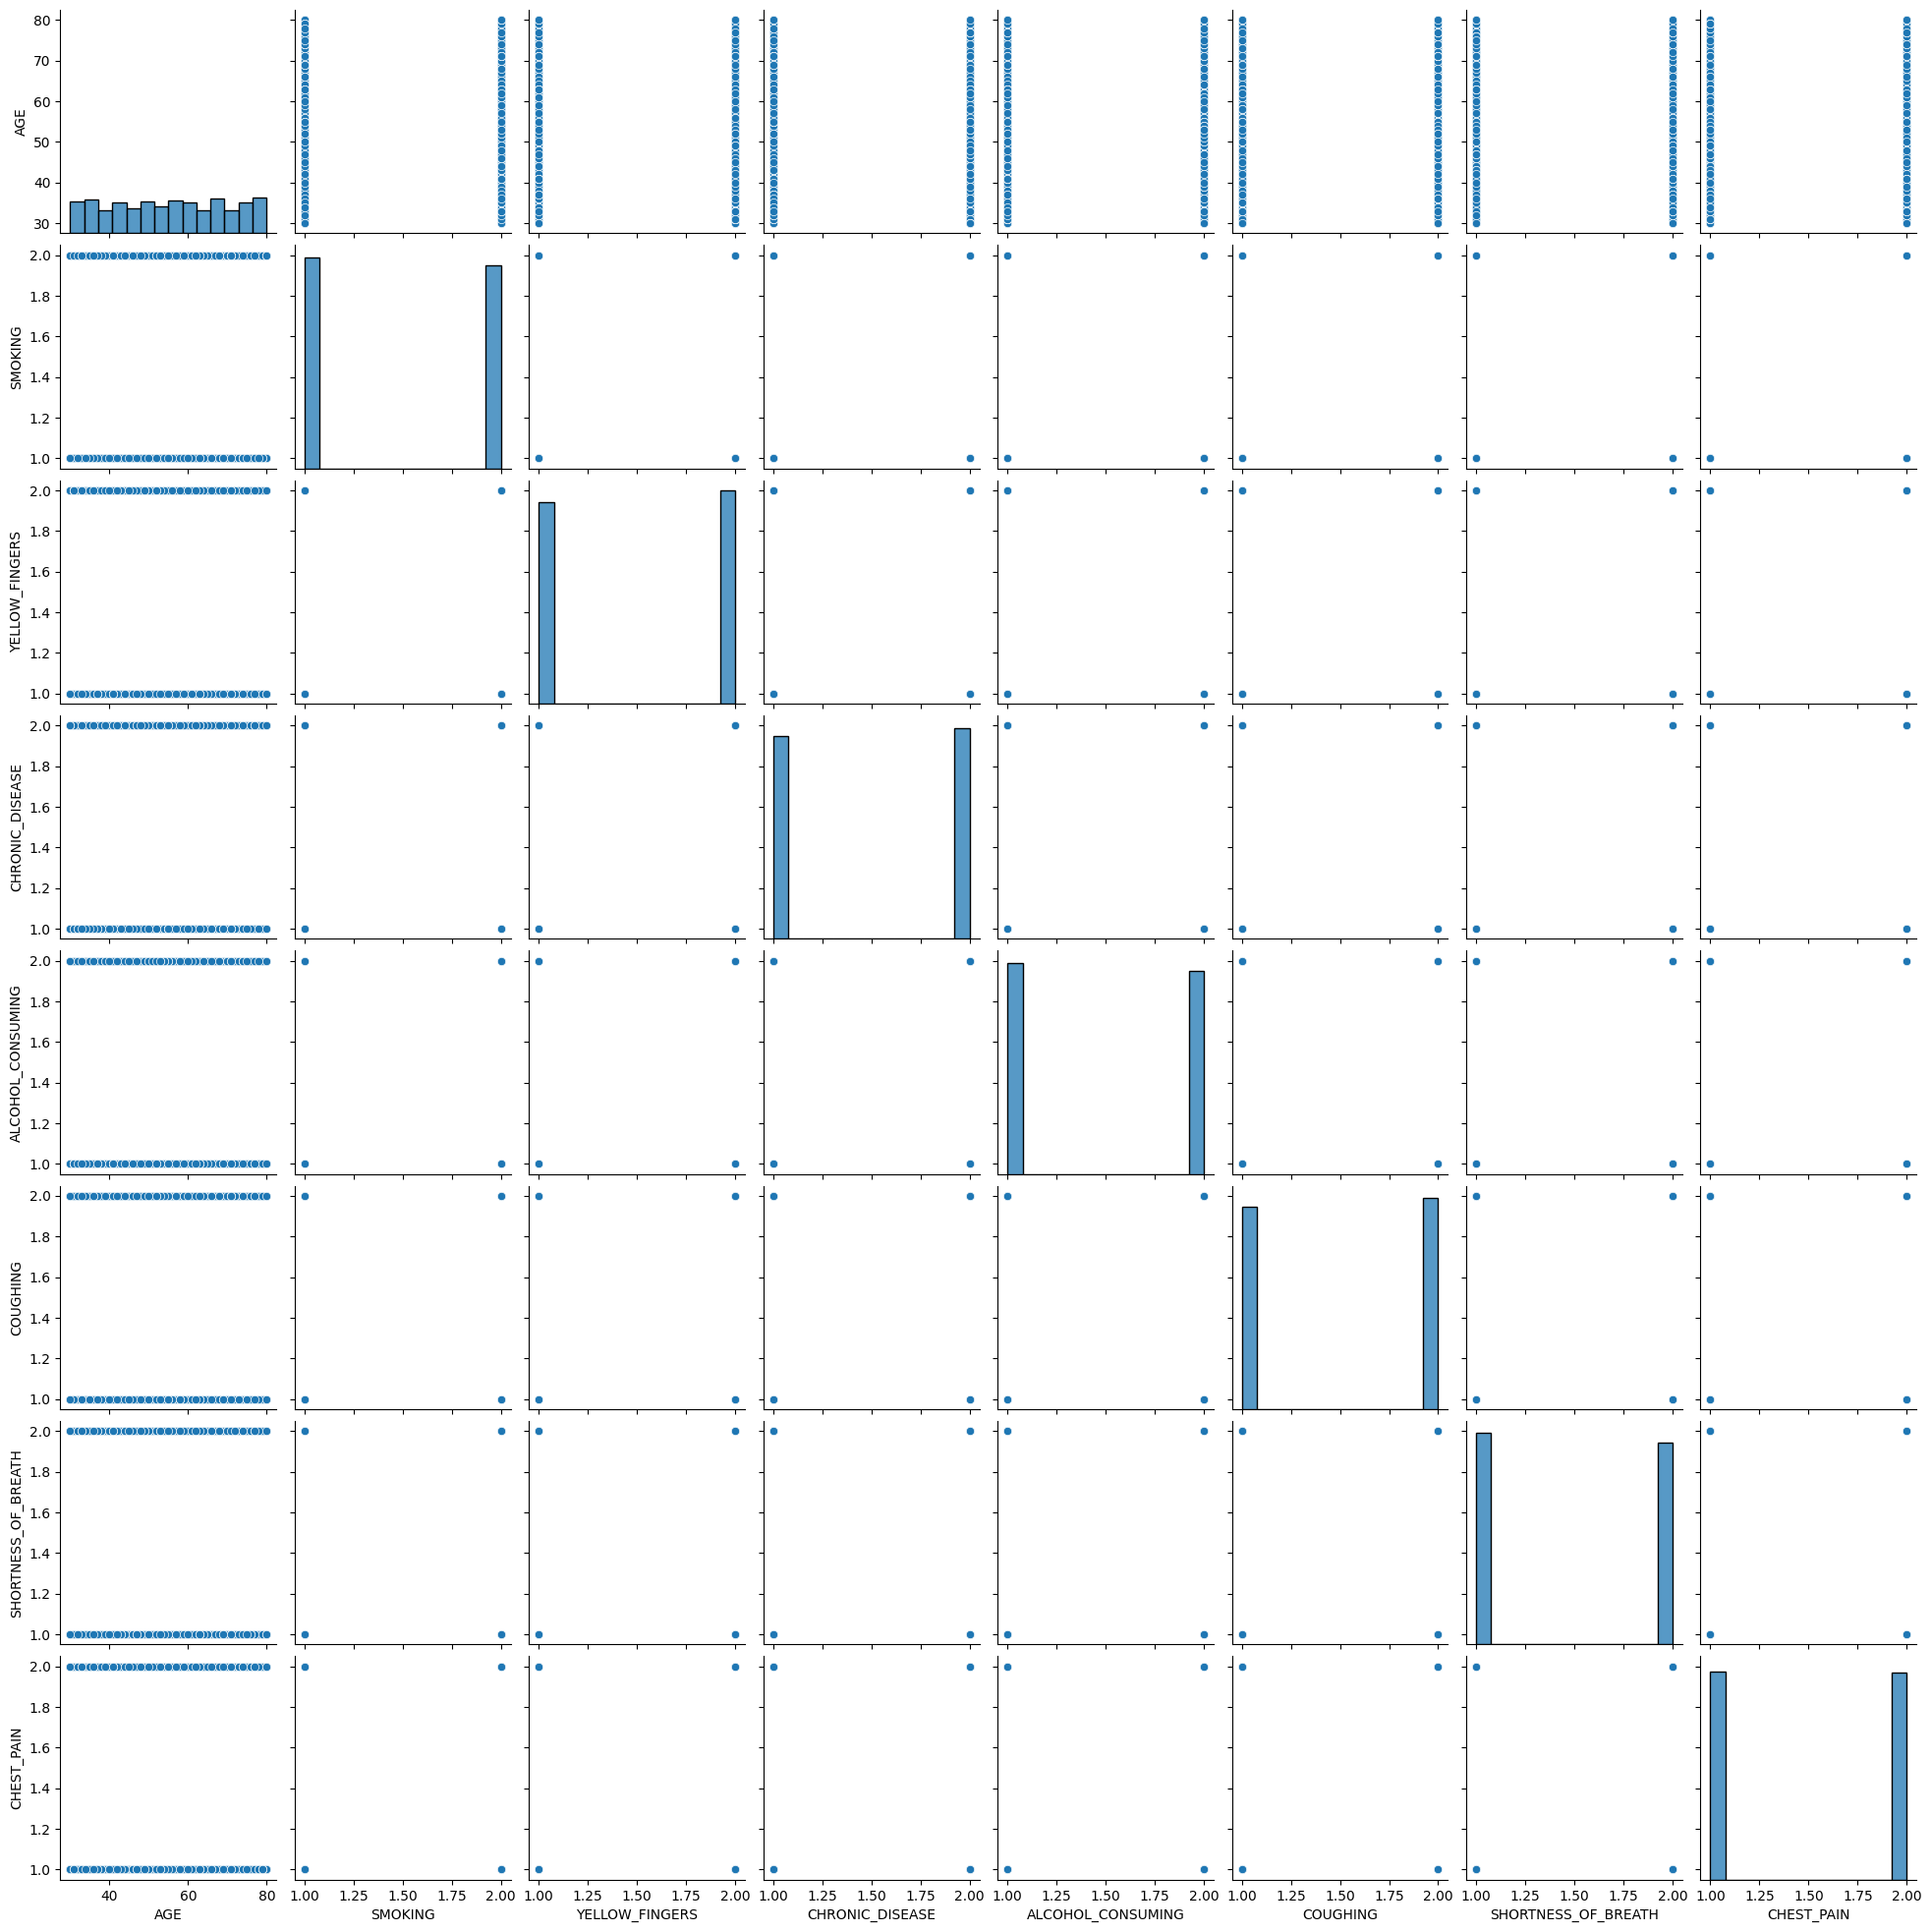

In [46]:
sns.pairplot(df)